# Status

Exercise 1 has been completed to full extend, exercise 2 will be added soon.


In [4]:
import numpy as np
import csv

#1 Open the file './data/befkbhalderstatkode.csv' 
#2 Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

filename = '../notebooks/data/befkbhalderstatkode.csv'

bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
            
print(bef_stats_df)              


[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [5]:
#3 Using this data: Find out how many people lived in each of the 11 areas in 2015

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

dd = bef_stats_df
mask = (dd[1,4]) # First number = citycode second equal amount of people

def number_of_people_per_neighbourhood(city_code):
    all_people_in_given_city_code = dd[(dd[:,1] == city_code)]
    sum_of_people = all_people_in_given_city_code[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people


for state in neighb.keys():
    print('The state:', state, 'has ', number_of_people_per_neighbourhood(state), 'people living there')
    


The state: 1 has  1082102 people living there
The state: 2 has  1625260 people living there
The state: 3 has  1738984 people living there
The state: 4 has  1248038 people living there
The state: 5 has  1112590 people living there
The state: 6 has  869588 people living there
The state: 7 has  950509 people living there
The state: 8 has  1097492 people living there
The state: 9 has  1169260 people living there
The state: 10 has  1198828 people living there
The state: 99 has  76745 people living there


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

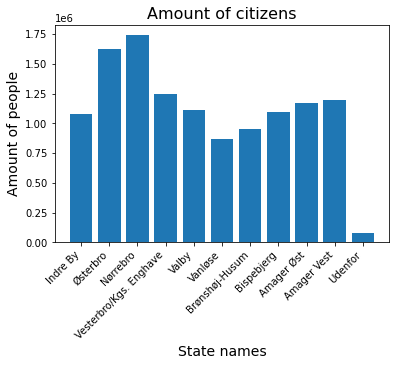

In [18]:
# Make a bar plot to show the size of each city area from the smallest to the largest
import matplotlib.pyplot as plt

number_of_people = []
for state in neighb.keys():
        number_of_people.append(number_of_people_per_neighbourhood(state))
state_codes = list(neighb.values()) 


plt.bar(state_codes, number_of_people, align='center')

plt.title("Amount of citizens", fontsize=16)
plt.xlabel("State names", fontsize=14)
plt.ylabel("Amount of people", fontsize=14)

plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')



In [56]:
# 5 Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
city_code = 1 # Find the one for Copenhagen 
age = 65
year = 2015 
mask = (dd[:,0] == year ) & (dd[:,2]<=age) & (dd[:,1] == city_code)

print('Amount of people above 65 in the cph areas:',np.sum(dd[mask][:,4]))

#6 How many of those were from the other nordic countries (not dk)
nationality_codes = [5110, 5106, 5105, 5101,5120, 5104] 
mask_not_danish = [(dd[:,0] == year ) & (dd[:,2]<=age) & (dd[:,1] == city_code) & (dd[:,3] == c_code)  for c_code in nationality_codes]

number_citizens_not_dane = np.array(np.sum(mask_not_danish))

print('Amount of people above 65 in the cph areas from nordic contries:',number_citizens_not_dane)

Amount of people above 65 in the cph areas: 45119
Amount of people above 65 in the cph areas from nordic contries: 213


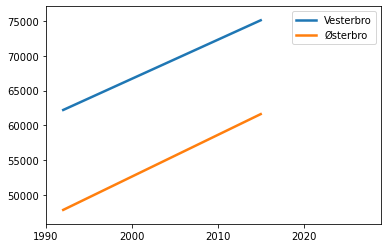

In [142]:
#7 Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015


# data to be plotted for Vesterbro 
mask = (dd[:,1] == 2)
v_sum_92 = np.sum(dd[(dd[:,0] == 1992) & mask][:,4])
v_sum_15 = np.sum(dd[(dd[:,0] == 2015) & mask][:,4])

# data to be plotted for Østerbro 
mask = (dd[:,1] == 4)
oe_sum_92 = np.sum(dd[(dd[:,0] == 1992) & mask][:,4])
oe_sum_15 = np.sum(dd[(dd[:,0] == 2015) & mask][:,4])

# adding data to plot 
plt.axis([1990, 2029, min([v_sum_92, v_sum_15, oe_sum_92, oe_sum_15])-2000, max([v_sum_92, v_sum_15,oe_sum_92, oe_sum_15]) + 2000])
p1 = plt.plot([1992, 2015], [v_sum_92, v_sum_15], label='Vesterbro',linewidth="2.5")
p2 = plt.plot([1992, 2015], [oe_sum_92, oe_sum_15],label='Østerbro',linewidth="2.5")
plt.xticks([1990,2000,2010, 2020])
plt.legend()

plt.ticklabel_format(useOffset=False)




  
